# Library

In [ ]:
from library import *


2023-09-28 11:28:13.736596: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 11:28:13.870276: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-28 11:28:13.870303: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-28 11:28:13.889524: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-28 11:28:15.909271: W tensorflow/stream_executor/platform/de

# Data importation

In [ ]:
data = pd.read_csv("Datasets/data.csv", sep=";")
data

,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,id_participant
0,2,6,7,3,8,4,-1,-1,0,57,d60c0832fc30e645ca04f074c44b49eb
1,6,5,3,6,1,2,-1,-1,0,57,d60c0832fc30e645ca04f074c44b49eb
2,6,3,3,8,1,3,-1,-1,0,57,d60c0832fc30e645ca04f074c44b49eb
3,7,6,10,3,0,9,-1,-1,0,57,d60c0832fc30e645ca04f074c44b49eb
4,3,5,8,6,5,7,-1,-1,0,57,d60c0832fc30e645ca04f074c44b49eb
...,...,...,...,...,...,...,...,...,...,...,...
4477,1,6,1,11,5,8,3,2,1,21,d617476c80b6823ed202f5b86916156d
4478,2,5,11,14,3,5,4,3,1,21,d617476c80b6823ed202f5b86916156d
4479,1,6,1,11,4,2,1,5,1,21,d617476c80b6823ed202f5b86916156d
4480,4,1,11,1,5,7,7,8,1,21,d617476c80b6823ed202f5b86916156d


In [ ]:
#regroupe les scénarios en 3 catégories
data["scenario"] = [1 if (i > 0 and i < 4) else 2 if (i > 3 and i < 7) else 3 if i < 9 else 4 for i in data["scenario"]]
#data[data.scenario < 4]
data["strength_diff"]=data.strength_left - data.strength_right
for char in ["left","right"]:
    data["age_" + char]=[0 if i == 1 else 3 if i == 6 else 10 if i == 7 else 1 for i in data[char+"_char"]]
data["age_diff"]=data.age_left - data.age_right
data

,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,id_participant,strength_diff,age_left,age_right,age_diff
0,2,6,7,3,8,2,-1,-1,0,57,d60c0832fc30e645ca04f074c44b49eb,4,1,3,-2
1,6,5,3,6,1,1,-1,-1,0,57,d60c0832fc30e645ca04f074c44b49eb,-3,3,1,2
2,6,3,3,8,1,1,-1,-1,0,57,d60c0832fc30e645ca04f074c44b49eb,-5,3,1,2
3,7,6,10,3,0,4,-1,-1,0,57,d60c0832fc30e645ca04f074c44b49eb,7,10,3,7
4,3,5,8,6,5,3,-1,-1,0,57,d60c0832fc30e645ca04f074c44b49eb,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,1,6,1,11,5,3,3,2,1,21,d617476c80b6823ed202f5b86916156d,-10,0,3,-3
4478,2,5,11,14,3,2,4,3,1,21,d617476c80b6823ed202f5b86916156d,-3,1,1,0
4479,1,6,1,11,4,1,1,5,1,21,d617476c80b6823ed202f5b86916156d,-10,0,3,-3
4480,4,1,11,1,5,3,7,8,1,21,d617476c80b6823ed202f5b86916156d,10,1,0,1


# Set train and test dataset

In [ ]:
#set feature_names
feature_names = ["right_char","left_char","strength_diff","age_diff","scenario","age","sex"]


In [ ]:
#get X and Y
X = data[data.scenario < 4][feature_names]
Y = data[data.scenario < 4].value_left

In [ ]:
#split in train & test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


# Random forest

## Model train

In [ ]:
#we get the best parameters for the RFC
RFC = RandomForestClassifier(max_depth=10, max_leaf_nodes=95)

#Number of trees in random forest
n_estimators = [(i + 1) * 10 for i in range(10)]

# Method of selecting samples for training each tree
bootstrap = [True, False]

#We add the other parameters for Random Forest
params = {
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 3, 4, 8, 10, 16, 32],
    "n_estimators": n_estimators,
    "bootstrap": bootstrap
}

grid_search_cv = GridSearchCV(RFC, params, verbose=1, cv=5, scoring='accuracy', return_train_score=True)
grid_search_cv


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, max_leaf_nodes=95),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4, 8, 10, 16, 32],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
#model fitting
grid_search_cv.fit(X_train, Y_train)
best_RF = grid_search_cv.best_estimator_
print("Best: %f using %s" % (grid_search_cv.best_score_, grid_search_cv.best_params_))


Fitting 5 folds for each of 280 candidates, totalling 1400 fits
Best: 0.491059 using {'bootstrap': True, 'criterion': 'gini', 'min_samples_split': 8, 'n_estimators': 60}


In [ ]:
#saving the model
filename = 'Model/RF.pkl'
print("Sauvegarde du modèle dans ", filename)
f = open(filename, "wb")
pickle.dump(best_RF, f)
f.close()

Sauvegarde du modèle dans  Model/RF.pkl


In [ ]:
# loading the model
RF = pickle.load(open(filename, 'rb'))
print(RF)

RandomForestClassifier(max_depth=10, max_leaf_nodes=95, min_samples_split=8,
                       n_estimators=60)


In [ ]:
#tree representation
dot_data = tree.export_graphviz(RF.estimators_[0],
                                out_file="Model representation/RF.dot",
                                feature_names=feature_names,
                                class_names=[str(s) for s in range(11)],
                                filled=True,
                                rounded=True,
                                special_characters=True)
call(['dot', '-Tpng', "Model representation/RF.dot", '-o', 'Model representation/RF.png', '-Gdpi=600'])

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.251096 to fit


0

## Model test

In [ ]:
#Test on the test set
Y_test_predict_proba = RF.predict_proba(X_test)
Y_test_predict = RF.predict(X_test)

In [ ]:
#confusion matrix & report classification
print("Confusion matrix\n",multilabel_confusion_matrix(Y_test, Y_test_predict)[0])
print( classification_report(Y_test, Y_test_predict, output_dict=False, target_names=[str(i) for i in range(11)]))

Confusion matrix
 [[699  38]
 [ 22  38]]
              precision    recall  f1-score   support

           0       0.50      0.63      0.56        60
           1       0.20      0.06      0.09        33
           2       0.42      0.42      0.42        67
           3       0.41      0.53      0.46        76
           4       0.51      0.38      0.43        64
           5       0.67      0.75      0.71       211
           6       0.38      0.16      0.22        38
           7       0.42      0.37      0.40        59
           8       0.44      0.29      0.35        72
           9       0.40      0.25      0.31        48
          10       0.44      0.74      0.55        69

    accuracy                           0.51       797
   macro avg       0.44      0.42      0.41       797
weighted avg       0.49      0.51      0.49       797



In [ ]:
#confusion matrix of prediction to within 1 class
Y_test = pd.concat([Y_test], ignore_index=True)
classification_report_opti(Y_test, Y_test_predict)

0 :  {'TN': 691, 'FN': 20, 'FP': 46, 'TP': 40}
1 :  {'TN': 634, 'FN': 11, 'FP': 130, 'TP': 22}
2 :  {'TN': 604, 'FN': 20, 'FP': 126, 'TP': 47}
3 :  {'TN': 565, 'FN': 22, 'FP': 156, 'TP': 54}
4 :  {'TN': 402, 'FN': 13, 'FP': 331, 'TP': 51}
5 :  {'TN': 457, 'FN': 39, 'FP': 129, 'TP': 172}
6 :  {'TN': 475, 'FN': 16, 'FP': 284, 'TP': 22}
7 :  {'TN': 658, 'FN': 23, 'FP': 80, 'TP': 36}
8 :  {'TN': 632, 'FN': 35, 'FP': 93, 'TP': 37}
9 :  {'TN': 591, 'FN': 11, 'FP': 158, 'TP': 37}
10 :  {'TN': 636, 'FN': 14, 'FP': 92, 'TP': 55}
class | precision | recall | f1-score | accuracy
0     |  0.465     |  0.667  |  0.548    |  0.917
1     |  0.145     |  0.667  |  0.238    |  0.823
2     |  0.272     |  0.701  |  0.392    |  0.817
3     |  0.257     |  0.711  |  0.378    |  0.777
4     |  0.134     |  0.797  |  0.229    |  0.568
5     |  0.571     |  0.815  |  0.672    |  0.789
6     |  0.072     |  0.579  |  0.128    |  0.624
7     |  0.31     |  0.61  |  0.411    |  0.871
8     |  0.285     |  0.514

[0.917, 0.823, 0.817, 0.777, 0.568, 0.789, 0.624, 0.871, 0.839, 0.788, 0.867]

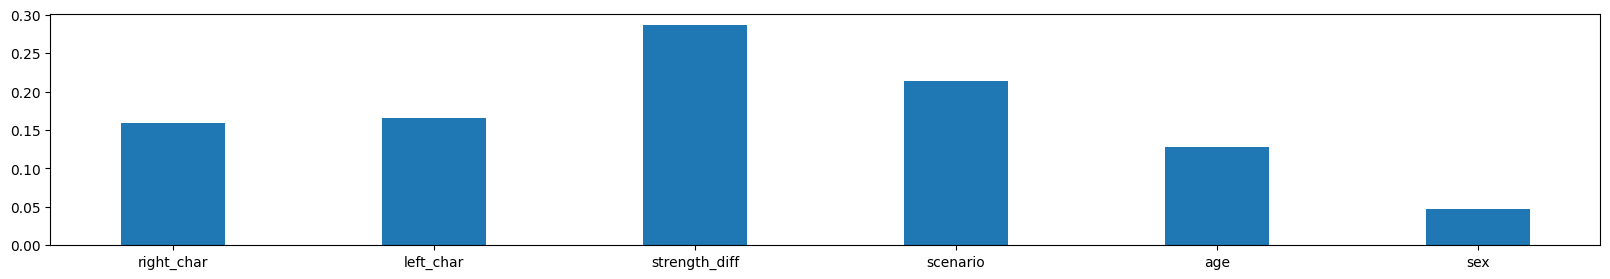

In [ ]:
#features importances
plt.rcParams["figure.figsize"] = (20, 3)

plt.bar(feature_names, RF.feature_importances_, width=0.4)
plt.show()

In [ ]:
exp = LimeTabularExplainer(X_test.values[:, :],
                           feature_names=feature_names,
                           discretize_continuous=True,
                           class_names=range(11))

exp.explain_instance(X_test.iloc[0, :],
                     RF.predict_proba,
                     top_labels=1).show_in_notebook()

NameError: name 'LimeTabularExplainer' is not defined

# Average accuracy on 10 train/test dataset different

In [ ]:
display(RF.get_params())
column = ['0 acc_0','0 acc_1','1 acc_0','1 acc_1','2 acc_0','2 acc_1','3 acc_0','3 acc_1','4 acc_0','4 acc_1','5 acc_0','5 acc_1','6 acc_0','6 acc_1','7 acc_0','7 acc_1','8 acc_0','8 acc_1','9 acc_0','9 acc_1','10 acc_0','10 acc_1']
class_accuracy = pd.DataFrame(columns=column)
for i in tqdm(range(10)):
    print(" Modèle n°"+str(i+1)+" : STARTED \n")
    rand_int = random.randint(2, 1000)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=rand_int)

    #model train
    RF_test = RandomForestClassifier(**RF.get_params())
    RF_test.fit(X_train, Y_train)

    #model test
    Y_test_predict_proba = RF_test.predict_proba(X_test)
    Y_test_predict = RF_test.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_test_predict)
    print("Accuracy on test set: ", accuracy)

    #classification
    acc_0, prec_0 = accuracy_inclasses(Y_test, Y_test_predict)
    print( classification_report(Y_test, Y_test_predict, output_dict=False, target_names=[str(i) for i in range(11)]))
    Y_test = pd.concat([Y_test], ignore_index=True)
    acc_1 = classification_report_opti(Y_test, Y_test_predict)
    
    for j in range(11):
        class_accuracy.at[i, str(j) + " acc_0"] = acc_0[j]
        class_accuracy.at[i, str(j) + " acc_1"] = acc_1[j]
    print("\n")
    print(" Modèle n°"+str(i+1)+" : FINISHED \n")


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': 95,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

  0%|          | 0/10 [00:00<?, ?it/s] Modèle n°1 : STARTED 

Accuracy on test set:  0.4642409033877039
class 0 :  [[685  59]
 [ 23  30]]
TP :  30 TN :  685
class 1 :  [[744   4]
 [ 43   6]]
TP :  6 TN :  744
class 2 :  [[699  25]
 [ 50  23]]
TP :  23 TN :  699
class 3 :  [[647  64]
 [ 53  33]]
TP :  33 TN :  647
class 4 :  [[703  27]
 [ 48  19]]
TP :  19 TN :  703
class 5 :  [[491 116]
 [ 36 154]]
TP :  154 TN :  491
class 6 :  [[746   8]
 [ 35   8]]
TP :  8 TN :  746
class 7 :  [[705  30]
 [ 38  24]]
TP :  24 TN :  705
class 8 :  [[692  33]
 [ 50  22]]
TP :  22 TN :  692
class 9 :  [[745  10]
 [ 30  12]]
TP :  12 TN :  745
class 10 :  [[686  51]
 [ 21  39]]
TP :  39 TN :  686
 AVG accuracy : 0.4642409033877039
              precision    recall  f1-score   support

           0       0.34      0.57      0.42        53
           1       0.60      0.12      0.20        49
           2       0.48      0.32      0.38        73
           3       0.34      0.38      0.36        86
       

In [ ]:
round(class_accuracy.mean() * 100, 1)

0 acc_0     93.8
0 acc_1     91.9
1 acc_0     95.6
1 acc_1     81.3
2 acc_0     91.7
2 acc_1     85.7
3 acc_0     91.4
3 acc_1     83.8
4 acc_0     93.5
4 acc_1     61.0
5 acc_0     83.5
5 acc_1     76.8
6 acc_0     93.0
6 acc_1     60.8
7 acc_0     91.1
7 acc_1     83.0
8 acc_0     91.6
8 acc_1     85.2
9 acc_0     95.6
9 acc_1     81.0
10 acc_0    93.9
10 acc_1    91.4
dtype: float64

In [ ]:
models_df = pd.DataFrame({'basic':[ 59, 56, 57, 58, 58, 58, 61, 58, 57, 57],
        'opti': [ 80.2, 80.2, 80.0, 80.3, 79.9, 80.2, 80.5, 80.4, 80.2, 80.2] } )
print("basc: ",models_df.basic.mean(),"\nopti: ",models_df.opti.mean())

basc:  57.9 
opti:  80.21000000000001


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df420847-9b7d-4085-bb2b-2d13083511fa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>